(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


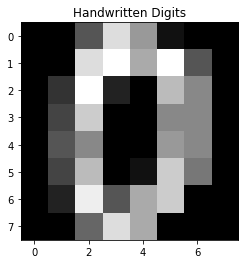

In [1]:
# -*- coding: utf-8 -*-
# 使用LR进行MNIST手写数字分类
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.title('Handwritten Digits')
plt.imshow(digits.images[0])
plt.show()

In [2]:
# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

In [3]:
# 创建cart分类器
from sklearn.tree import DecisionTreeClassifier
cart_model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=21, min_samples_split=4, 
                       min_samples_leaf=2,  
                       random_state=2030)

In [4]:
# 网格搜索
from sklearn.model_selection import GridSearchCV
# 预设各参数的不同选项值
max_depth = [18,19,20,21,22]
min_samples_split = [2,4,6,8]
min_samples_leaf = [2,4,8,10,12]
parameters = {'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}
# 网格搜索法，测试不同的参数值
grid_dtcateg = GridSearchCV(estimator = cart_model, param_grid = parameters, cv=10)
# 模型拟合
grid_dtcateg.fit(train_x, train_y)
# 返回最佳组合的参数值
grid_dtcateg.best_params_

{'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [5]:
best_model=grid_dtcateg.best_estimator_

In [6]:
best_model

DecisionTreeClassifier(max_depth=18, min_samples_leaf=2, random_state=2030)

In [7]:
best_model.fit(train_x,train_y)
predict_y=best_model.predict(test_x)
print('CART准确率: %0.4lf' % accuracy_score(predict_y, test_y))

CART准确率: 0.8533
